In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')

# 2do Desafío: Visualizaciones en Python

Dataset a usar: [Diabetes, Hypertension and Stroke Prediction](https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=health_data.csv)

El dataset se realizó en base a una encuesta para personas que sufran o hayan sufrido con diabetes, hipertensión o ACV. El enfoque que daremos en este caso será sobre las personas que sufren **diabetes**.

In [2]:
# Importación del dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJIHhvX0P1dCnfskv0EKQlYNt95BRPGta4-yu5kzlKPIly7Hg33_BiuJtzQ8mkNs4lLwqdjgTcmZIC/pub?gid=1513689152&single=true&output=csv"
df = pd.read_csv(url)

# Conversión de columna de sexo para mejor legibilidad
df['Sex'].replace([0, 1],['Mujer','Hombre'],inplace=True)

# Conversión de columnas de categorías
columnas = ["HighChol", "CholCheck", "Smoker", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
            "HvyAlcoholConsump", "DiffWalk", "Stroke", "HighBP", "Diabetes"]
for i in columnas:
    df[i].replace([0, 1],["No", "Si"],inplace=True)

# Visualización del dataset
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,Hombre,No,Si,26,No,No,Si,No,Si,No,3,5,30,No,No,Si,No
1,12,Hombre,Si,Si,26,Si,No,No,Si,No,No,3,0,0,No,Si,Si,No
2,13,Hombre,No,Si,26,No,No,Si,Si,Si,No,1,0,10,No,No,No,No
3,11,Hombre,Si,Si,28,Si,No,Si,Si,Si,No,3,0,3,No,No,Si,No
4,8,Mujer,No,Si,29,Si,No,Si,Si,Si,No,2,0,0,No,No,No,No


## Variables:

| Variable | Descripción |
| ---|---|
| Age | Edad divida en 13 categorías|
|Sex|Sexo|
|HighChol|Posee colesterol alto|
|CholCheck|Se hizo un chequeo de colesterol en los últimos 5 años|
|BMI|Índice de masa corporal|
|Smoker|Ha fumado más de 100 cigarrillos en su vida|
|HeartDiseaseorAttack|Sufre de enfermedad de las arterias coronarias|
|PhysActivity|Realizó actividad física en los últimos 30 días|
|Fruits|Consume frutas una o más veces por día|
|Veggies|Consume vegetales una o más veces por día|
|HvyAlcoholConsump|Bebe más de 14 tragos en la semana (o 7 para mujeres)|
|GenHlth|En la escala del 1 al 5 (siendo 1 excelente y 5 muy pobre) que tan bien considera su salud|
|MentHlth|Días con salud mental pobre (escala 1-30 días)|
|PhysHlth|Sufrió alguna lesión en los últimos 30 días (escala 1-30 días)|
|DiffWalk|Posee dificultad caminando o subiendo escaleras|
|Stroke|Ha sufrido un ACV|
|HighBP|Tiene presión de sangre alta|
|Diabetes|Sufre de diabetes|

## 1. Distribución por edades

Las edades dentro del dataset está dividido en 13 categorías:

|Categoría|1|2|3|4|5|6|7|8|9|10|11|12|13|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**Edades**|18-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59|60-64|65-69|70-74|75-79|80+|

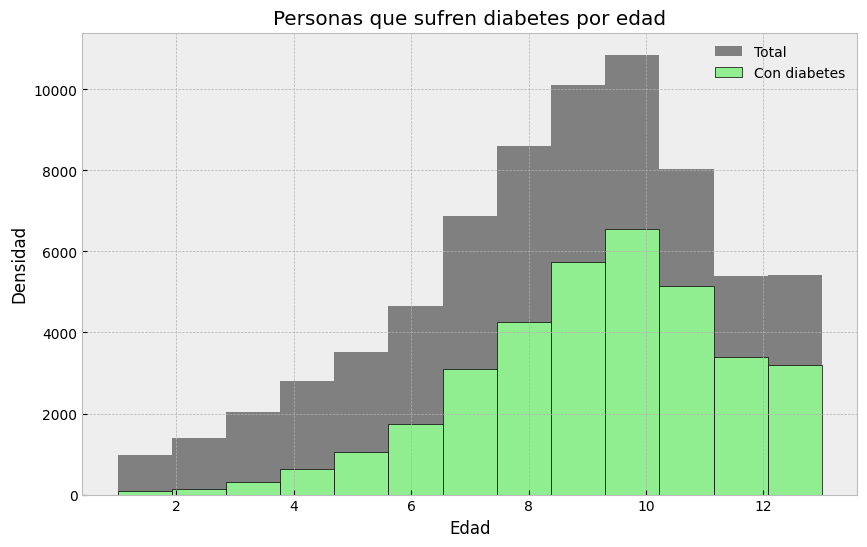

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df["Age"].values.flatten(), bins=13, color = "gray", label="Total")
ax.hist(df[df['Diabetes'] == "Si"]["Age"].values.flatten(), bins=13, color = "lightgreen", edgecolor = "black", label="Con diabetes")
ax.legend(loc='best', frameon=False)
ax.set_xlabel("Edad")
ax.set_ylabel("Densidad")
ax.set_title("Personas que sufren diabetes por edad");

Como se puede observar, el dataset contiene mayor cantidad de personas con diabetes entre la categoría 9, 10 y 11. Esto puede darse por alguna correlación entre esas edades y la enfermedad, o simplemente porque las personas de esas categorías han sido las mas encuestadas (como puede verse en el total).

## 2. Distribución por sexo

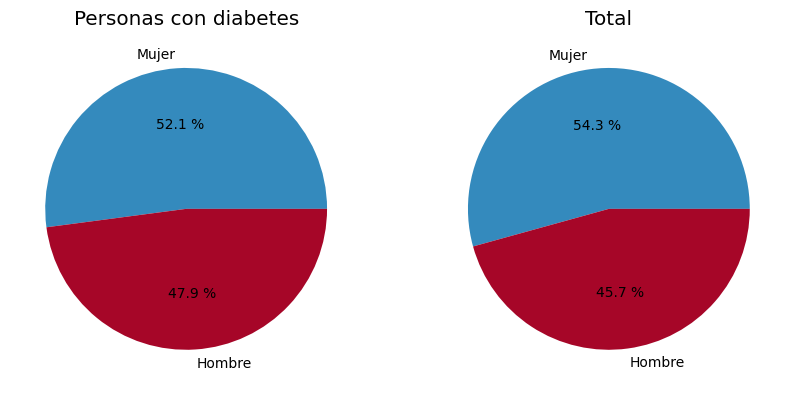

In [4]:
frecuencia_sexos = df[df['Diabetes'] == "Si"]["Sex"].value_counts().tolist()
frecuencia_sexos_total = df["Sex"].value_counts().tolist()
nombres = ["Mujer", "Hombre"]

fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].pie(frecuencia_sexos, labels=nombres, autopct="%0.1f %%")
ax[0].set_title("Personas con diabetes")
ax[1].pie(frecuencia_sexos_total, labels=nombres, autopct="%0.1f %%")
ax[1].set_title("Total");

De ambos gráficos se puede suponer que el sexo de una persona no es influyente para contraer diabetes

## 3. Distribución por BMI

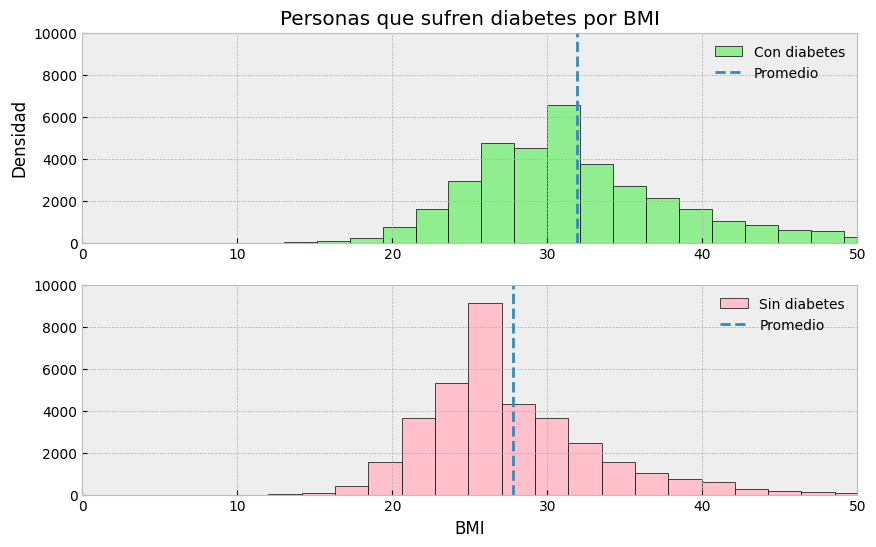

In [5]:
fig, ax = plt.subplots(2, figsize=(10,6))

ax[0].hist(df[df['Diabetes'] == "Si"]["BMI"].values.flatten(), bins=40, color = "lightgreen", edgecolor = "black", label="Con diabetes")
ax[0].vlines(df[df['Diabetes'] == "Si"]["BMI"].mean(), 0, 10000, label="Promedio", linestyle="--")
ax[0].set_xlim([0, 50])
ax[0].set_ylim([0, 10000])
ax[0].set_ylabel("Densidad")
ax[0].set_title("Personas que sufren diabetes por BMI");
ax[0].legend(loc='best', frameon=False)

ax[1].hist(df[df['Diabetes'] == "No"]["BMI"].values.flatten(), bins=40, color = "pink", edgecolor = "black", label="Sin diabetes")
ax[1].set_xlabel("BMI")
ax[1].vlines(df[df['Diabetes'] == "No"]["BMI"].mean(), 0, 10000, label="Promedio", linestyle="--")
ax[1].set_xlim([0, 50])
ax[1].set_ylim([0, 10000])
ax[1].legend(loc='best', frameon=False);

Se puede deducir en este caso que las personas que sufren diabetes tienden a tener un BMI más alto que aquellos que no tienen diabetes.

## 4. Distribución de salud general

<Figure size 640x480 with 0 Axes>

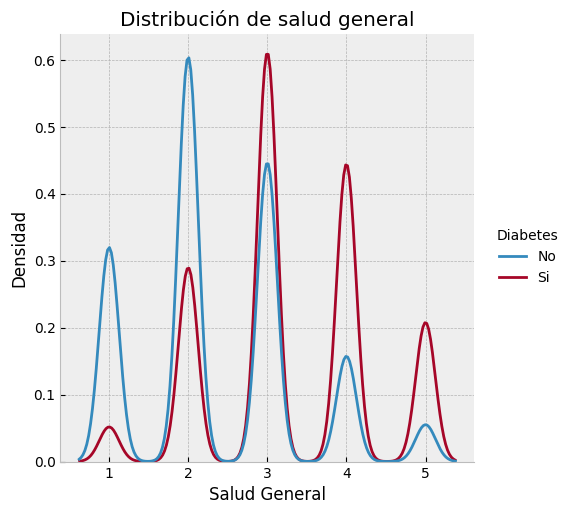

In [6]:
plt.figure()
ax = sns.displot(data=df, x="GenHlth", kind='kde', hue='Diabetes', fill=False)
ax.set(xlabel="Salud General", ylabel="Densidad", title="Distribución de salud general");

Un aspecto interesante y contrario al sentido común que se pudo observar es que las personas con diabetes consideran tener una vida mucho más saludable que aquellos sin diabetes.

## 5. Categorización de la distribución de BMI por sexo

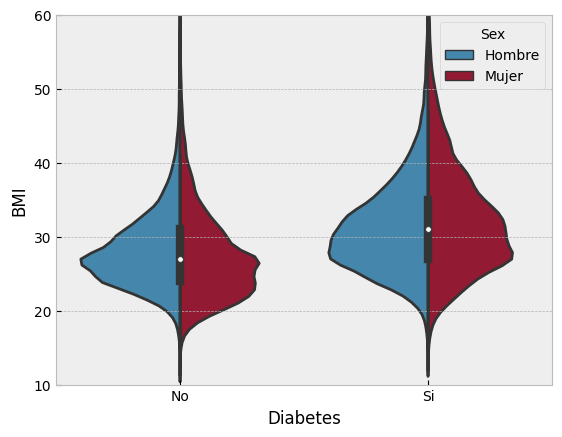

In [7]:
fig, ax = plt.subplots()
sns.violinplot(data=df, x='Diabetes', y='BMI', hue="Sex", split=True, ax=ax)
ax.set(ylim=[10,60]);

Se observa que, mientras la distribución de los hombres se encuentra más centralizado, las mujeres sin diabetes tienden a tener un BMI más bajo que los hombres sin diabetes, y aquellas con diabetes tienden a tener un BMI más alto que los hombres con diabetes.

Este dato en sí carece de importancia en términos generales pero resulta interesante mencionarlo como un detalle pequeño.

## 6. Distribución de personas que sufren de presión alta

<Figure size 640x480 with 0 Axes>

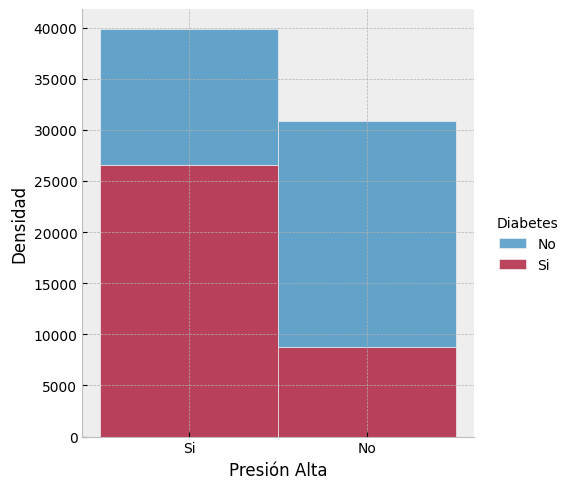

In [8]:
plt.figure()
ax = sns.displot(data=df, x="HighBP", hue="Diabetes", multiple="stack")
ax.set(xlabel="Presión Alta", ylabel="Densidad");

Por último, se puede apreciar que existe una correlación entre tener presión alta y padecer diabetes.